In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [26]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [27]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.duplicated().sum()

403

In [30]:
df.drop_duplicates(keep='first',inplace=True)

In [31]:
#def char_len(inp):
  #  return len(inp.split())

In [32]:
#df['char_len']=df['text'].apply(char_len)
#df.head()

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
def num_words(inp):
    return len(nltk.word_tokenize(inp))

In [35]:
df['num_words']=df['text'].apply(num_words)
df.head()

,target,text,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",24
1,ham,Ok lar... Joking wif u oni...,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,ham,U dun say so early hor... U c already then say...,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",15


In [37]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",24,2
1,ham,Ok lar... Joking wif u oni...,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,ham,U dun say so early hor... U c already then say...,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,1


In [40]:
df['num_chars']=df['text'].apply(lambda x:len(x))
df.head()

,target,text,num_words,num_sent,num_chars
0,ham,"Go until jurong point, crazy.. Available only ...",24,2,111
1,ham,Ok lar... Joking wif u oni...,8,2,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,ham,U dun say so early hor... U c already then say...,13,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
df['target']=le.fit_transform(df['target'])

In [44]:
df.head()

,target,text,num_words,num_sent,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [45]:
df.describe()

,target,num_words,num_sent,num_chars
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,18.456375,1.962275,78.923776
std,0.332253,13.323322,1.433892,58.174846
min,0.000000,1.000000,1.000000,2.000000
25%,0.000000,9.000000,1.000000,36.000000
50%,0.000000,15.000000,1.000000,60.000000
75%,0.000000,26.000000,2.000000,117.000000
max,1.000000,220.000000,38.000000,910.000000


<AxesSubplot:>

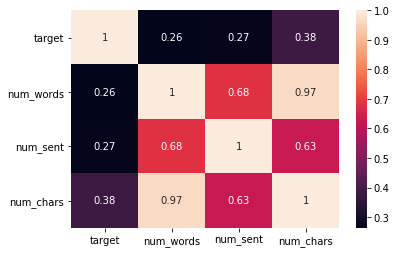

In [48]:
sns.heatmap(df.corr(),annot=True)

In [52]:
#ham
df[df['target']==0][['num_words','num_sent','num_chars']].describe()

,num_words,num_sent,num_chars
count,4516.000000,4516.000000,4516.000000
mean,17.123339,1.815545,70.456820
std,13.491315,1.364098,56.356802
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [53]:
#spam
df[df['target']==1][['num_words','num_sent','num_chars']].describe()

,num_words,num_sent,num_chars
count,653.000000,653.000000,653.000000
mean,27.675345,2.977029,137.479326
std,7.011513,1.493676,30.014336
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,131.000000
50%,29.000000,3.000000,148.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,223.000000


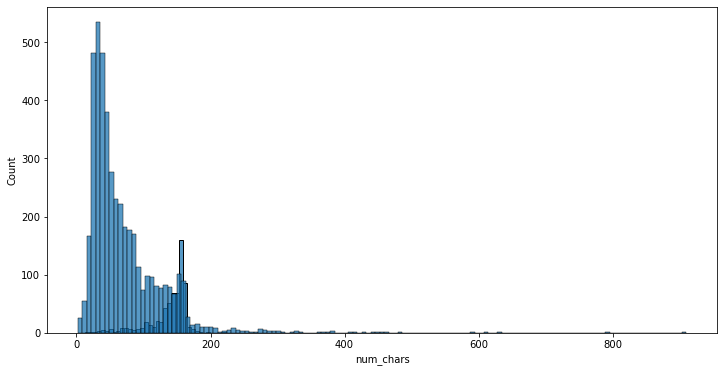

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==1]['num_chars'])
sns.histplot(df[df['target']==0]['num_chars'])
plt.show()

# data preprocessing

In [92]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
nltk.download('wordnet')
import re
  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
stopwords=stopwords.words('english')

In [66]:
lm=WordNetLemmatizer()

In [67]:
df.head()

,target,text,num_words,num_sent,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [95]:
def text_preprocess(inp):
    inp=re.sub('[^A-Za-z]',' ',inp)
    inp=inp.lower()
    inp=inp.split()
    
    inp=[lm.lemmatize(word) for word in inp if word not in stopwords.words('english')]
    return ' '.join(inp)
    
            
    
    

In [97]:
df['processed_text']=df['text'].apply(text_preprocess)
df.head()

,target,text,num_words,num_sent,num_chars,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think go usf life around though


In [98]:
from collections import Counter

In [118]:
#spam
d=df[df['target']==1]['processed_text'].tolist()
d
spam_corpus=[]
for msg in d:
    for word in msg.split():
        spam_corpus.append(word)
most_spam_words=Counter(spam_corpus)
most_spam_words






Counter({'free': 197,
         'entry': 22,
         'wkly': 9,
         'comp': 8,
         'win': 57,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkts': 2,
         'st': 22,
         'may': 6,
         'text': 128,
         'receive': 27,
         'question': 10,
         'std': 7,
         'txt': 141,
         'rate': 33,
         'c': 93,
         'apply': 25,
         'freemsg': 14,
         'hey': 5,
         'darling': 2,
         'week': 55,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 2,
         'ok': 5,
         'xxx': 11,
         'chgs': 1,
         'send': 59,
         'rcv': 4,
         'winner': 13,
         'valued': 8,
         'network': 26,
         'customer': 42,
         'selected': 21,
         'receivea': 1,
         'prize': 85,
         'reward': 10,
         'claim': 98,
         'call': 339,
         'code': 28,
         'kl': 1,
         'valid': 24,
        

In [124]:
pd.DataFrame(most_spam_words.most_common(20))

,0,1
0,call,339
1,free,197
2,u,165
3,p,158
4,txt,141
5,text,128
6,mobile,121
7,ur,119
8,stop,114
9,claim,98


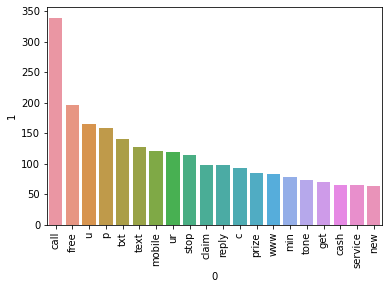

In [128]:
sns.barplot(x=pd.DataFrame(most_spam_words.most_common(20))[0],y=pd.DataFrame(most_spam_words.most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# model builing

In [129]:
df.head()

,target,text,num_words,num_sent,num_chars,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think go usf life around though


In [139]:
df['processed_text']=df['processed_text'].str.lower()
x=df['processed_text']
y=df['target']

In [140]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [141]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [142]:
x=cv.fit_transform(x).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [144]:
y=y.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [148]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [150]:
X_train.shape

(4135, 7021)

In [1]:
# here precision is important parameter,since we cant afford to predict ham email as spam
#so we have to select that model which have high precision

In [151]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [152]:
models=[gnb,mnb,bnb]

In [153]:
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model)
    print('accuracy:',accuracy_score(y_pred,y_test))
    print('precision:',precision_score(y_pred,y_test))

GaussianNB()
accuracy: 0.8916827852998066
precision: 0.8405797101449275
MultinomialNB()
accuracy: 0.9642166344294004
precision: 0.9202898550724637
BernoulliNB()
accuracy: 0.9738878143133463
precision: 0.8405797101449275


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [157]:
classifiers=[svc,knc,mnb,dtc,lrc,rfc,abc,bc,etc,gbdt,xgb]

In [159]:
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    print(classifier)
    
    print('accuracy:',accuracy_score(y_pred,y_test))
    print('precision:',precision_score(y_pred,y_test))
    

SVC(gamma=1.0, kernel='sigmoid')
accuracy: 0.9410058027079303
precision: 0.717391304347826
KNeighborsClassifier()
accuracy: 0.9110251450676983
precision: 0.3333333333333333
MultinomialNB()
accuracy: 0.9642166344294004
precision: 0.9202898550724637
DecisionTreeClassifier(max_depth=5)
accuracy: 0.9274661508704062
precision: 0.5144927536231884
LogisticRegression(penalty='l1', solver='liblinear')
accuracy: 0.9738878143133463
precision: 0.8333333333333334
RandomForestClassifier(n_estimators=50, random_state=2)
accuracy: 0.9680851063829787
precision: 0.7608695652173914
AdaBoostClassifier(random_state=2)
accuracy: 0.9738878143133463
precision: 0.8333333333333334
BaggingClassifier(n_estimators=50, random_state=2)
accuracy: 0.9622823984526112
precision: 0.8115942028985508
ExtraTreesClassifier(n_estimators=50, random_state=2)
accuracy: 0.9758220502901354
precision: 0.8333333333333334
GradientBoostingClassifier(n_estimators=50, random_state=2)
accuracy: 0.9448742746615088
precision: 0.62318840579

C:\Users\MOHIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
accuracy: 0.9729206963249516
precision: 0.8333333333333334
